In [130]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('../data/nx/Viennasubway.csv',delimiter=';')

,Start,Stop,Line,Color
0,Oberlaa,Neulaa,1,red
1,Neulaa,Alaudagasse,1,red
2,Alaudagasse,Altes Landgut,1,red
3,Altes Landgut,Troststrasse,1,red
4,Troststrasse,Reumannplatz,1,red


In [17]:
# Converting to a list of tuples including the 'weight' attribute
tuples = [(x[0],x[1]) for x in train.values]

In [86]:
schedule=nx.Graph()

schedule.add_edges_from(tuples)

colors = train.Color.values.tolist()
lines = train.Line.values.tolist()
for i,edge in enumerate(schedule.edges):
    schedule.edges[edge]['line'] = lines[i]
    schedule.edges[edge]['color'] = colors[i]
    
l1,l2 = list(train.Start.unique()),list(train.Stop.unique())
print([v for v in l2 if v not in l1])
l1.extend(['Leopoldau', 'Simmering', 'Heiligenstradt', 'Floridsdorf'])
schedule.add_nodes_from(l1)

['Leopoldau', 'Simmering', 'Heiligenstradt', 'Floridsdorf']


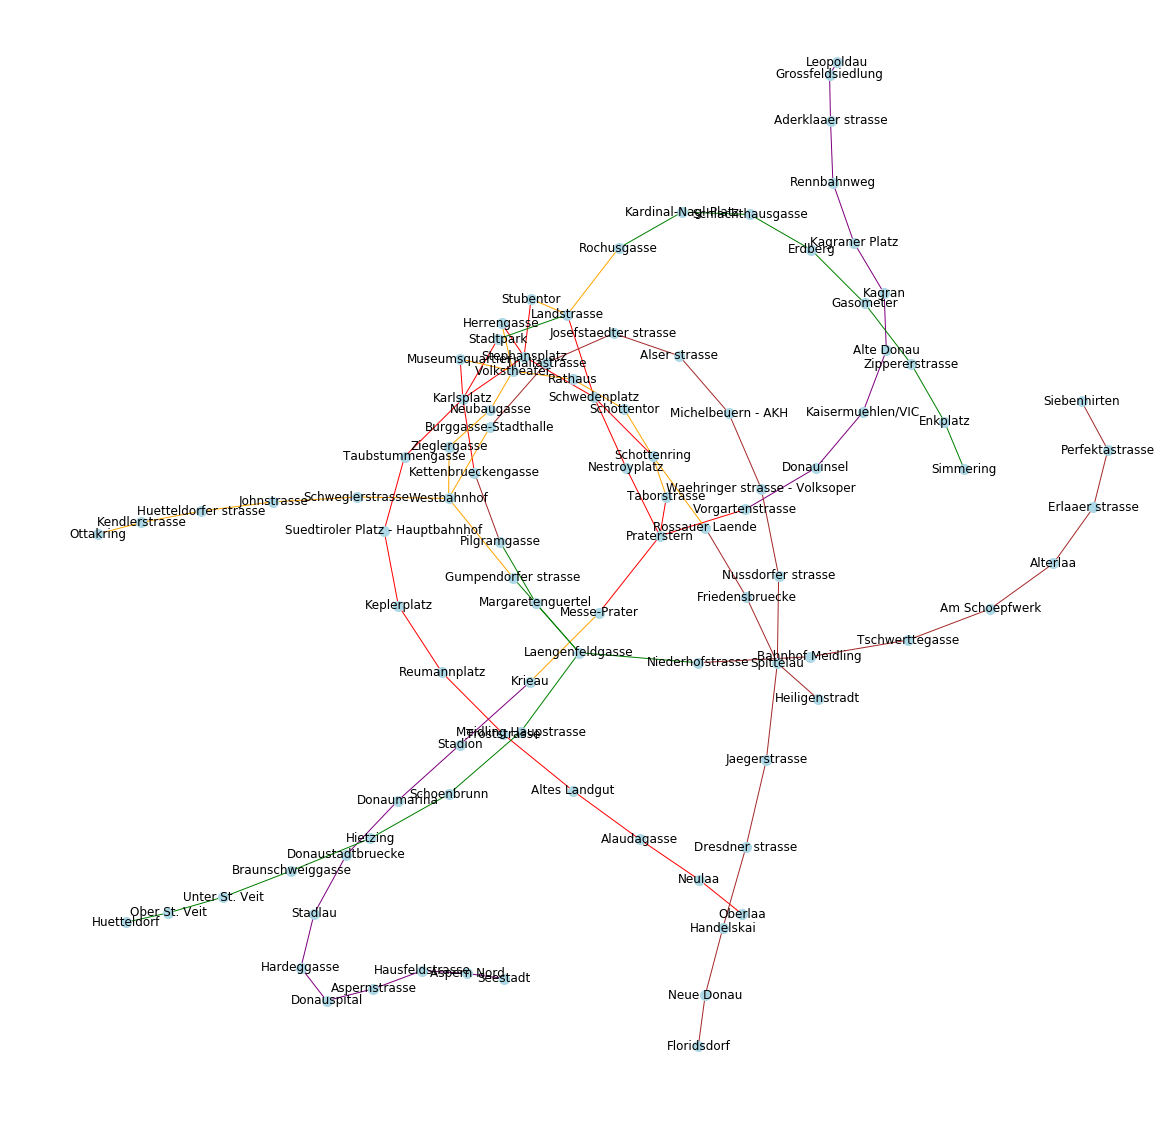

In [121]:
#Drawing the basic graph

pos = nx.spring_layout(schedule)

plt.rcParams['figure.figsize']=[20,20]
nx.draw_networkx(schedule,
                 pos=pos, 
                 node_color='lightblue',
                 edge_color=colors,
                 node_size=100,
                 with_labels=True,
                 )
plt.axis('off')
plt.show()

In [122]:
numberofnodes=schedule.number_of_nodes()
nodedegrees=list(dict(schedule.degree()).values())
av_degree=np.mean(nodedegrees)
med_degree=np.median(nodedegrees)
clustering=list(nx.clustering(schedule).values())
betweenness_cent=list(nx.betweenness_centrality(schedule).values())
componentsizes=[len(c) for c in sorted(nx.connected_components(schedule), key=len, reverse=True)]

This graph has 98 nodes and 104 edges.
The median degree is 2.0 and the mean degree is 2.122448979591837.
A train node with median degree is connected to 2.0408163265306123% of other diseases.
There are 1 connected components within the graph.


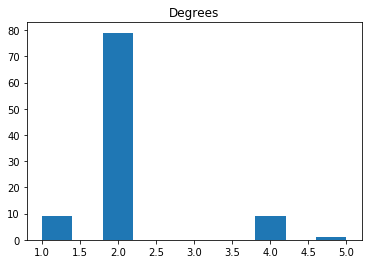

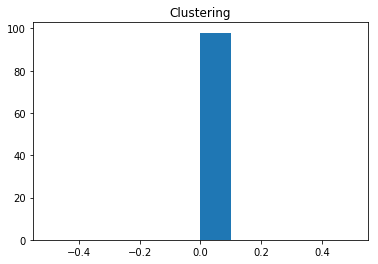

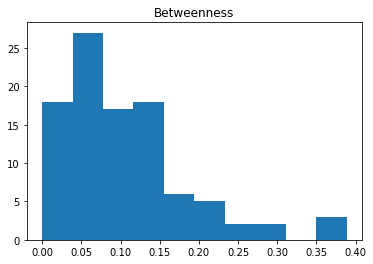

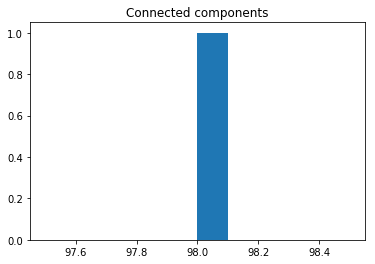

In [125]:
print("This graph has {} nodes and {} edges.".format(schedule.number_of_nodes(),schedule.number_of_edges()))

print("The median degree is {} and the mean degree is {}.".format(med_degree,av_degree))

print("A train node with median degree is connected to {}% of other diseases.".format((med_degree/numberofnodes)*100))

print("There are {} connected components within the graph.".format(nx.number_connected_components(schedule)))

plt.rcParams['figure.figsize']=[6,4]

plt.hist(nodedegrees)
plt.title('Degrees')
plt.show()

plt.hist(clustering)
plt.title('Clustering')
plt.show()

plt.hist(betweenness_cent)
plt.title('Betweenness')
plt.show()

plt.hist(componentsizes)
plt.title('Connected components')
plt.show()

In [127]:
# Pulling our node-level statistics together into a dataframe.
graph_stats=pd.DataFrame({'node':list(dict(schedule.degree()).keys()),
                          'degree':list(dict(schedule.degree()).values()),
                          'clustering':list(dict(nx.clustering(schedule)).values()),
                          'betweenness_cent':list(dict(nx.betweenness_centrality(schedule)).values())
                         })

# Assigning each node to a component by number.
graph_stats['component']=None

# Sorting the components by size so that the largest component will be numbered 0.
components=sorted(nx.connected_components(schedule), key=len, reverse=True)
for i,component in enumerate(components):
    graph_stats.loc[graph_stats['node'].isin(list(component)),'component']=i
    
print(graph_stats.head())

            node  degree  clustering  betweenness_cent  component
0        Oberlaa       1           0          0.000000          0
1         Neulaa       2           0          0.020619          0
2    Alaudagasse       2           0          0.040808          0
3  Altes Landgut       2           0          0.060567          0
4   Troststrasse       2           0          0.079897          0


In [128]:
# Logging these two for easier relationship viewing.
graph_stats['log_between']=np.log(graph_stats['betweenness_cent']+.001)
graph_stats['log_degree']=np.log(graph_stats['degree']+1)

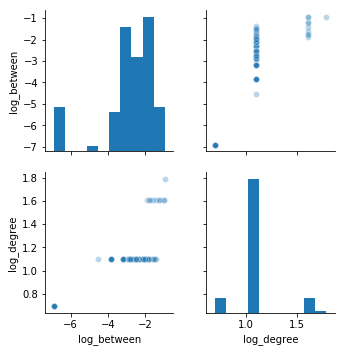

In [136]:
g = sns.pairplot(graph_stats,
                 vars=['log_between','log_degree'],
                 kind='scatter',
                plot_kws={'alpha':.3})
plt.show()